<a href="https://colab.research.google.com/github/harikrish2727/logistic-regression-on-insurance-dataset/blob/main/harikrishnanInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance2.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [ ]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
df["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

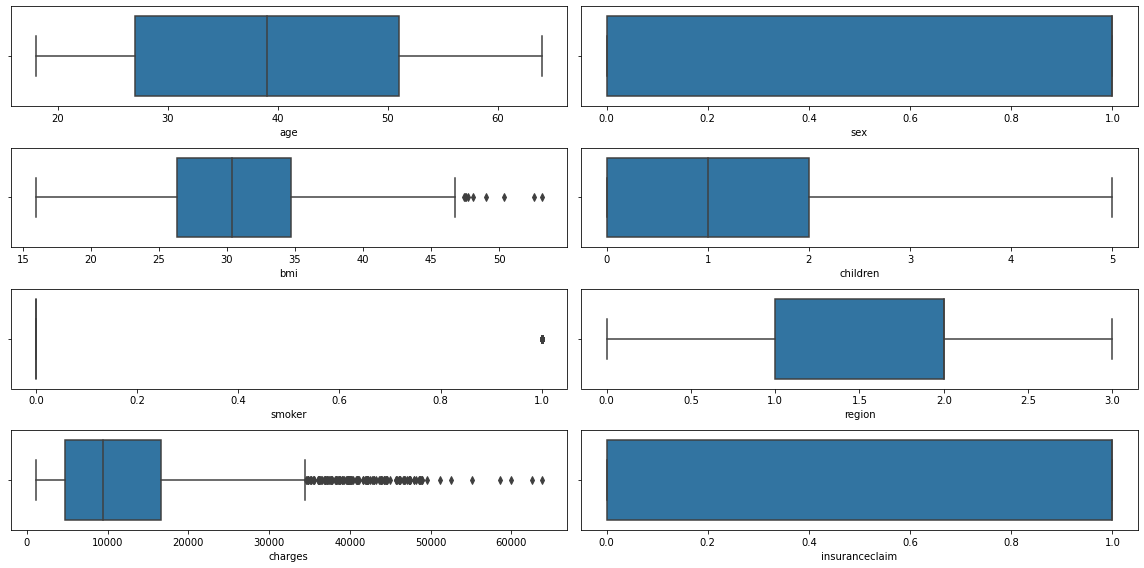

In [ ]:
fig,axs = plt.subplots(4,2,figsize=(16,8))
axs = axs.flatten()
index=0
for i,j in df.items():
    sns.boxplot(df[i],ax=axs[index])
    index+=1
    plt.tight_layout()
    
    

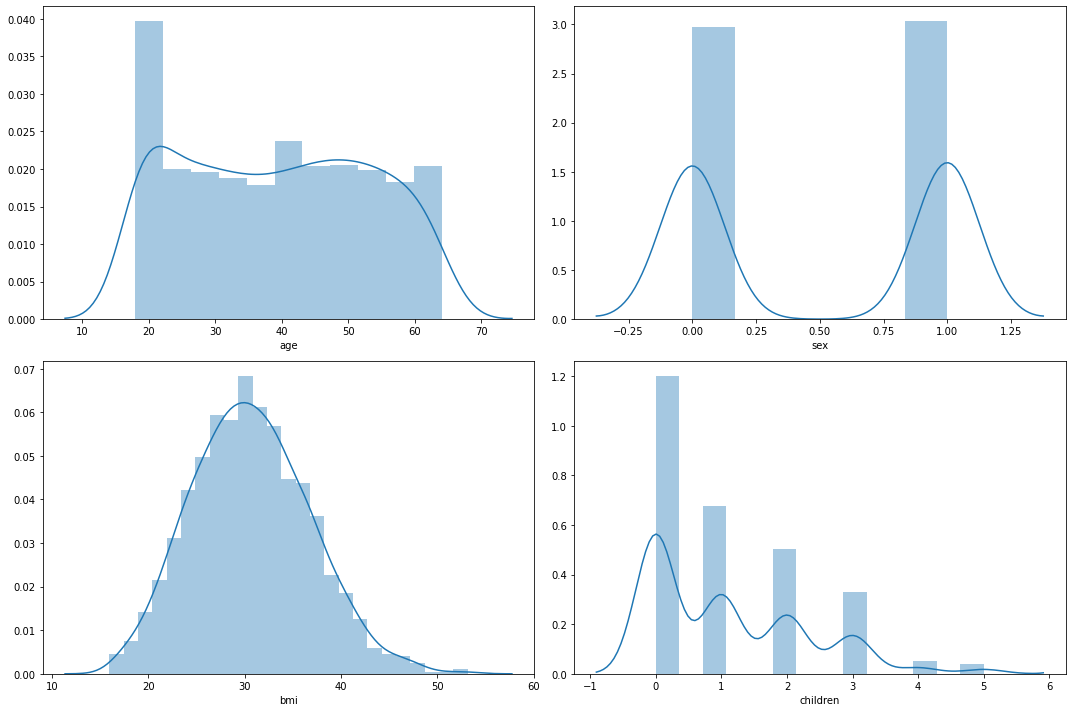

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
axs = axs.flatten()
index=0
for i in df[["age","sex","bmi","children"]]:
    sns.distplot(df[i],ax=axs[index])
    index+=1
    plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='bmi'>

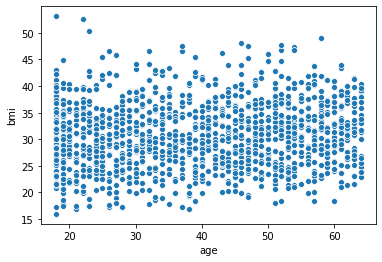

In [ ]:
sns.scatterplot(df["age"],df["bmi"])

<AxesSubplot:xlabel='insuranceclaim', ylabel='count'>

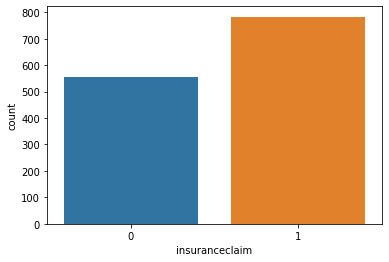

In [ ]:
sns.countplot(df["insuranceclaim"])

<AxesSubplot:xlabel='insuranceclaim', ylabel='count'>

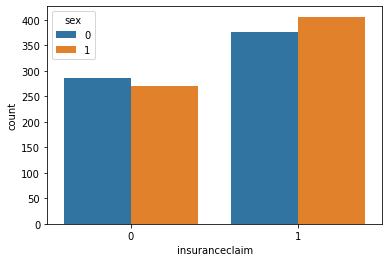

In [ ]:
sns.countplot(df["insuranceclaim"],hue=df["sex"])

<AxesSubplot:xlabel='insuranceclaim', ylabel='count'>

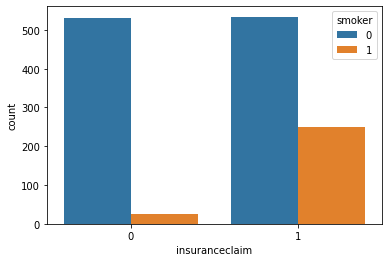

In [ ]:
sns.countplot(df["insuranceclaim"],hue=df["smoker"])

<AxesSubplot:xlabel='smoker', ylabel='count'>

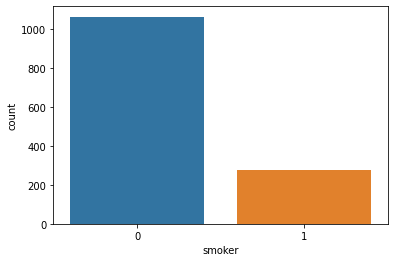

In [ ]:
sns.countplot(df["smoker"])

outlier treatment

In [ ]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi'>

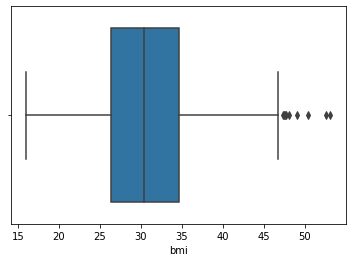

In [ ]:
sns.boxplot(df["bmi"])

In [ ]:
q1 = np.percentile(df["bmi"],25)

In [ ]:
q3 = np.percentile(df["bmi"],75)

In [ ]:
q1,q3

(26.29625, 34.69375)

In [ ]:
iqr = q3-q1

In [ ]:
low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [ ]:
low_lim,up_lim

(13.7, 47.290000000000006)

In [ ]:
df = df[df["bmi"]<up_lim]
df = df[df["bmi"]>low_lim]

In [ ]:
df["bmi"].describe()

count    1329.000000
mean       30.537348
std         5.919946
min        15.960000
25%        26.220000
50%        30.300000
75%        34.485000
max        46.750000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi'>

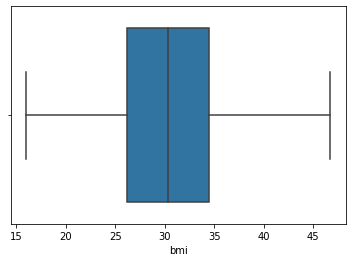

In [ ]:
sns.boxplot(df["bmi"])

<AxesSubplot:xlabel='charges'>

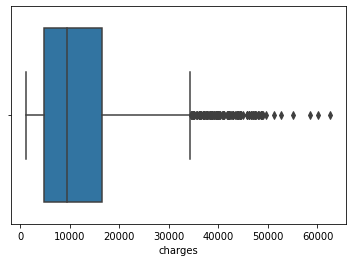

In [ ]:
sns.boxplot(df["charges"])

In [ ]:
df["charges"].describe()

count     1329.000000
mean     13212.333374
std      11997.236429
min       1121.873900
25%       4738.268200
50%       9361.326800
75%      16586.497710
max      62592.873090
Name: charges, dtype: float64

In [ ]:
q1 = np.percentile(df["charges"],25)
q3 = np.percentile(df["charges"],75)

iqr = q3-q1
iqr


11848.22951

In [ ]:
low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr
low_lim,up_lim

(-13034.076065, 34358.841975)

In [ ]:
#df = df[df["charges"]>low_lim]

In [ ]:
#df = df[df["charges"]<up_lim]

In [ ]:
df["charges"].describe()

count     1329.000000
mean     13212.333374
std      11997.236429
min       1121.873900
25%       4738.268200
50%       9361.326800
75%      16586.497710
max      62592.873090
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges'>

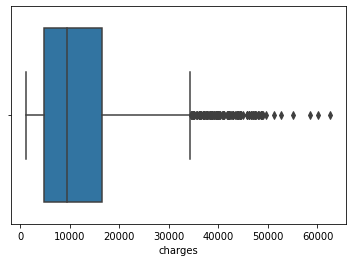

In [ ]:
sns.boxplot(df["charges"])

In [ ]:
#df = df[df["charges"]<24000]

In [ ]:
X = df.drop(["insuranceclaim"],axis=1)
y = df["insuranceclaim"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=43)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((930, 7), (399, 7), (930,), (399,))

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
488,44,0,38.06,0,1,2,48885.13561
1275,57,1,23.70,0,0,3,10959.33000
1147,20,0,31.92,0,0,1,2261.56880
1212,18,1,21.47,0,0,0,1702.45530
240,23,0,36.67,2,1,0,38511.62830


In [ ]:
from sklearn.preprocessing import minmax_scale,StandardScaler

In [ ]:
X_train = minmax_scale(X_train)

In [ ]:
X_test = minmax_scale(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[147,  17],
       [ 20, 215]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9072681704260651

In [ ]:
report = classification_report(y_test,y_pred)

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.90      0.89       164\n           1       0.93      0.91      0.92       235\n\n    accuracy                           0.91       399\n   macro avg       0.90      0.91      0.90       399\nweighted avg       0.91      0.91      0.91       399\n'